In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
# Build model to predict whether client pays back loan or not
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


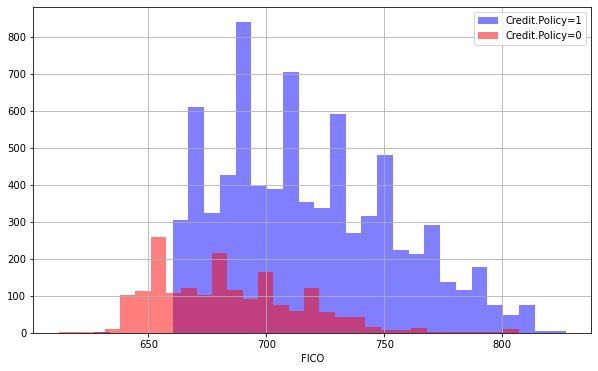

In [35]:
# Histogram of two FICO distributions on top of each other, one for each credit.policy outcome
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha = 0.5, color = 'blue', bins = 30, label = 'Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha = 0.5, color = 'red', bins = 30, label = 'Credit.Policy=0')
plt.legend();
plt.xlabel('FICO');

Text(0.5, 0, 'FICO')

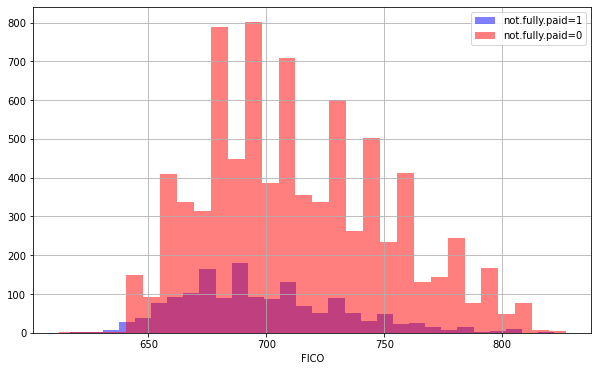

In [18]:
# Similar figure, except this time select by the not.fully.paid column
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha = 0.5, color = 'blue', bins = 30, label = 'not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha = 0.5, color = 'red', bins = 30, label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO');

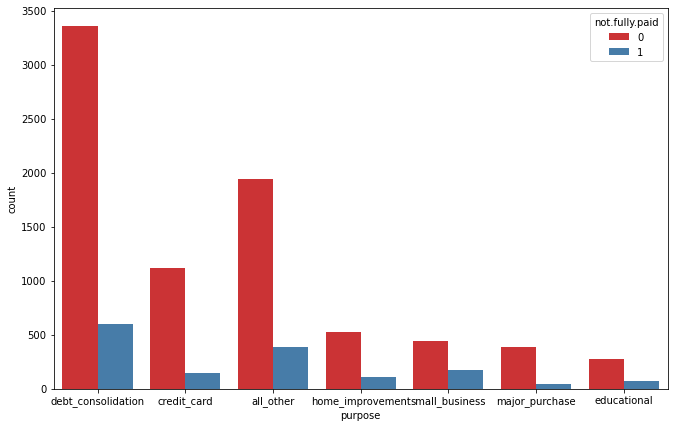

In [33]:
# countplot showing the counts of loans by purpose, with the color hue defined by not.fully.paid
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1');

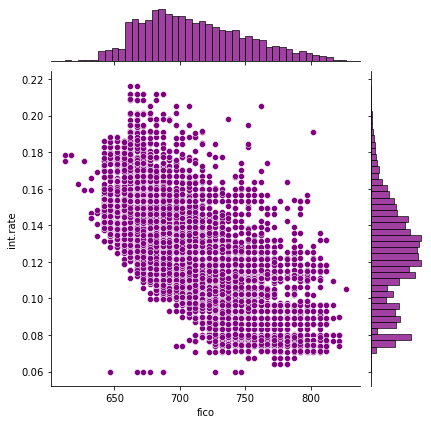

In [20]:
# Trend between FICO score and interest rate
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple');

## Random Forest Classifier

<Figure size 792x504 with 0 Axes>

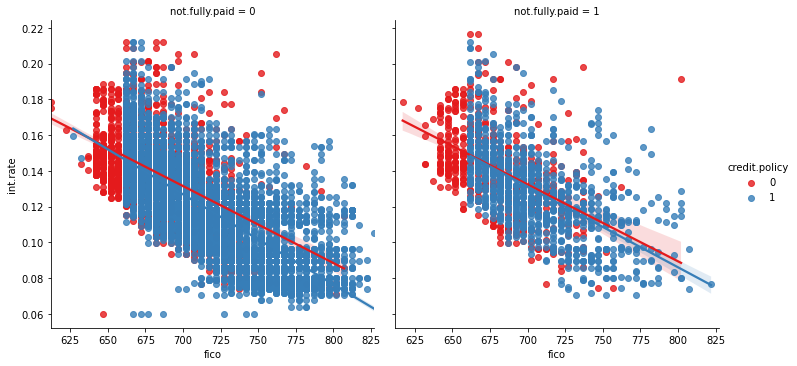

In [34]:
# Implots to see if the trend differed between not.fully.paid and credit.policy
plt.figure(figsize=(11,7));
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy', col='not.fully.paid',palette='Set1');

In [24]:
# Categorize 'purpose' column
dummy = ['purpose']
final_data = pd.get_dummies(loans, columns = dummy, drop_first = True)

In [26]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [27]:
# Train test data split
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Decision Tree Model

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



## Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [31]:
predictions = rfc.predict(X_test)

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874

